In [2]:
from time import time
import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import user_agents
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(10, 10)}, font_scale=1.2)

Task 1 
----------
- 1) Using sendy_logistics.csv dataset create a new column and call it 'Temp_Diff' that calculates the difference of 'Tempreture' Column and current temperture.
note: you can get current tempreture from searching on google.

In [40]:
log_df = pd.read_csv('datasets/sendy_logistics.csv')

In [41]:
log_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [42]:
def get_current_temp():
    url = "https://www.google.com/search?q=weather cairo&ie=UTF-8"
    html = requests.get(url).content
    soup = BeautifulSoup(html, 'html.parser')
    temp = soup.find('div', attrs={'class': 'BNeawe iBp4i AP7Wnd'}).text
    cuttent_temp = int(temp[0:2])
    return cuttent_temp

In [43]:
log_df['Temp_Diff'] = abs(log_df['Temperature'] - get_current_temp())

In [44]:
print("Cairo Cuttent Temp: ", get_current_temp())
log_df[['Temperature', 'Temp_Diff']]

Cairo Cuttent Temp:  29


,Temperature,Temp_Diff
0,20.4,8.6
1,26.4,2.6
2,NaN,NaN
3,19.2,9.8
4,15.4,13.6
...,...,...
21196,28.6,0.4
21197,26.0,3.0
21198,29.2,0.2
21199,15.0,14.0


- 2) Using sendy_logistics.csv dataset create a new column and call it 'Fehr_Temp' that calculates the fahrenheit tempreture from celsius 'Tempreture' Column.
note: you can get the converting formula celsius to fahrenheit from google. 

In [47]:
log_df['Fehr_Temp'] = (log_df['Temperature'] * 1.8)+32

In [49]:
log_df[['Temperature', 'Fehr_Temp']]

,Temperature,Fehr_Temp
0,20.4,68.72
1,26.4,79.52
2,NaN,NaN
3,19.2,66.56
4,15.4,59.72
...,...,...
21196,28.6,83.48
21197,26.0,78.80
21198,29.2,84.56
21199,15.0,59.00


Task 2
---------
- 1) Using ufo.csv dataset, extract Month from 'Time' and use it to create new column and call it 'IN_December', then it will have a value of '1' if the month is December and '0' otherwise.

In [50]:
ufo_df = pd.read_csv('datasets/ufo.csv')

In [51]:
ufo_df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [52]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


In [54]:
ufo_df['Time'] = pd.to_datetime(ufo_df['Time'])

In [57]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City             18216 non-null  object        
 1   Colors Reported  2882 non-null   object        
 2   Shape Reported   15597 non-null  object        
 3   State            18241 non-null  object        
 4   Time             18241 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 712.7+ KB


In [66]:
ufo_df['Time'].dt.month

0         6
1         6
2         2
3         6
4         4
         ..
18236    12
18237    12
18238    12
18239    12
18240    12
Name: Time, Length: 18241, dtype: int64

In [192]:
ufo_df['IN_December'] = ufo_df['Time'].apply(lambda l: 1 if l.month == 12 else 0)

In [193]:
ufo_df[['Time','IN_December']]

,Time,IN_December
0,1930-06-01 22:00:00,0
1,1930-06-30 20:00:00,0
2,1931-02-15 14:00:00,0
3,1931-06-01 13:00:00,0
4,1933-04-18 19:00:00,0
...,...,...
18236,2000-12-31 23:00:00,1
18237,2000-12-31 23:00:00,1
18238,2000-12-31 23:45:00,1
18239,2000-12-31 23:45:00,1


- 2) Using ufo.csv dataset, create new column and call it 'Time_Diff_From_WW1' that have time difference in years from the 'Time' Column and World War 1 start date that is 'July 28, 1914'.

In [189]:
ufo_df['Time_Diff_From_WW1'] = ufo_df['Time'].apply(lambda l: relativedelta(l.date(), datetime.date(1914,7,28)).years)

In [190]:
ufo_df[['Time', 'Time_Diff_From_WW1']]

,Time,Time_Diff_From_WW1
0,1930-06-01 22:00:00,15
1,1930-06-30 20:00:00,15
2,1931-02-15 14:00:00,16
3,1931-06-01 13:00:00,16
4,1933-04-18 19:00:00,18
...,...,...
18236,2000-12-31 23:00:00,86
18237,2000-12-31 23:00:00,86
18238,2000-12-31 23:45:00,86
18239,2000-12-31 23:45:00,86


Task 3
-------------
- 1) Using titanic_full.csv dataset, extract Mr,Miss,Mrs,etc.. from 'Name' column and use it to create new column and call it 'Title', then plot a countplot 
showing the count for each title in the dataset.

In [176]:
titanic_df = pd.read_csv('datasets/titanic_full.csv')

In [177]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [185]:
titanic_df['Title'] = titanic_df['Name'].apply(lambda l:l.split(',')[1]).apply(lambda l:l.split('.')[0])

In [186]:
titanic_df['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Don               1
 Ms                1
 Lady              1
 Capt              1
 Mme               1
 Jonkheer          1
 the Countess      1
 Sir               1
Name: Title, dtype: int64

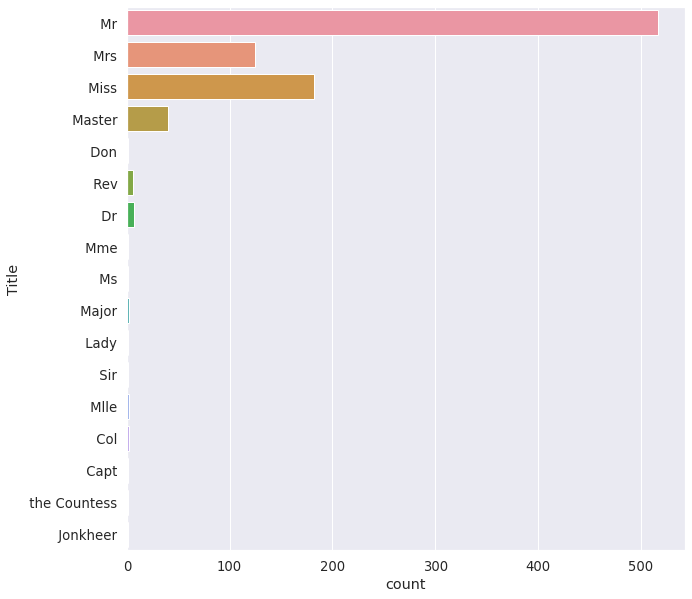

In [205]:
sns.countplot(y=titanic_df['Title'], data=titanic_df);

- 2) Using sendy_logistics.csv extract user_id in a seperate column.

In [207]:
sendy_df = pd.read_csv('datasets/sendy_logistics.csv')

In [208]:
sendy_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [211]:
sendy_df['user_id'] = sendy_df['User Id'].apply(lambda l:l.split('_')[-1])

In [212]:
sendy_df[['user_id', 'User Id']]

,user_id,User Id
0,633,User_Id_633
1,2285,User_Id_2285
2,265,User_Id_265
3,1402,User_Id_1402
4,1737,User_Id_1737
...,...,...
21196,2001,User_Id_2001
21197,1796,User_Id_1796
21198,2956,User_Id_2956
21199,2524,User_Id_2524


Task 4
------------
- 1) Using visitor-interests.csv dataset, from the first 50 row extract Browser, OS, Device data from 'UserAgent' column and use it to create new columns for Browser, OS, Device.

In [3]:
visitor_df = pd.read_csv('datasets/visitor-interests.csv')

In [4]:
visitor_df

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company
...,...,...,...,...,...
19921,223.62.3.2,Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...,KR,english,shop/online shopping website
19922,223.62.67.192,Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...,KR,english,shop/online shopping website
19923,223.73.243.82,Mozilla/5.0 (Linux; U; Android 5.1.1; zh-cn; v...,CN,chinese,educational institution
19924,223.73.66.65,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; ...,CN,english,magazine


In [169]:
def get_user_data(ua):
    ua = user_agents.parse(ua)
    return pd.Series((ua.os.family, ua.browser.family, ua.device.family))

visitor_df[['OS', 'Browser', 'Device']] = visitor_df['UserAgent'][0:51].apply(get_user_data)

In [170]:
visitor_df[['OS', 'Browser', 'Device']]

,OS,Browser,Device
0,Windows,Chrome,Other
1,Windows,Chrome,Other
2,Windows,Chrome,Other
3,Android,Chrome,Nexus 9
4,iOS,Mobile Safari,iPad
...,...,...,...
19921,NaN,NaN,NaN
19922,NaN,NaN,NaN
19923,NaN,NaN,NaN
19924,NaN,NaN,NaN


- 2) Using visitor-interests.csv dataset, from the first 50 row extract latitude, longitude from 'IP' column.

In [6]:
def get_user_ip_data(ip):
    response = ip2geo.get(ip, api_key='free')
    return pd.Series((response.latitude, response.longitude))

visitor_df[['latitude', 'longitude']] = visitor_df['IP'][0:51].apply(get_user_ip_data)

In [7]:
visitor_df[['IP', 'latitude', 'longitude']]

,IP,latitude,longitude
0,1.10.195.126,NaN,NaN
1,1.1.217.211,NaN,NaN
2,1.115.198.107,35.643227,139.740055
3,1.121.152.143,-33.869844,151.208285
4,1.123.135.213,-33.869844,151.208285
...,...,...,...
19921,223.62.3.2,NaN,NaN
19922,223.62.67.192,NaN,NaN
19923,223.73.243.82,NaN,NaN
19924,223.73.66.65,NaN,NaN
